<a href="https://colab.research.google.com/github/Priya-Issar/ML-Minor-Image-Classification/blob/main/Image_Classification(Minor_Prj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.13 ms


In [4]:
#!pip install bing-image-downloader

time: 2.93 s


In [5]:
#!mkdir images

time: 108 ms


In [13]:
# Preprocessing

import os   
import matplotlib.pyplot as plt   #displaying an image
import numpy as np
from skimage.io import imread   #reading an image
from skimage.transform import resize  #to make the size of all images same

target =[]    #for output
images = []   #for input
flat_data = []  #flattened data

DATADIR = '/content/drive/MyDrive/ML/image_Data'

CATEGORIES = ['Parrot','PolarBear','Zebra']

for category in CATEGORIES:
  #print(category)
  class_num = CATEGORIES.index(category)  #Label encoding the values
  #print(class_num)
  path = os.path.join(DATADIR,category)   #Create path to use all the images
 # print(path)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    
    #resizing the image
    img_resized = resize(img_array,(150,150,3))   #normalize the values to 0 to 1
    #flattening
    flat_data.append(img_resized.flatten())    #append flat data
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
   
   
      


time: 34.4 s


In [14]:
flat_data[0] #The values are in 1d,and all are pixel values
len(flat_data[0])

67500

time: 2.75 ms


In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

time: 4.21 ms


<BarContainer object of 3 artists>

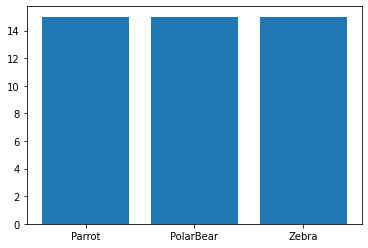

time: 119 ms


In [17]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [18]:
#Split Data into training and testing 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=120)

time: 222 ms


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000],'kernel':['linear']},
              { 'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['linear'],'kernel':['rbf']} , 
              
]  #the best parameter

svc = svm.SVC(probability = True)
clf =GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 23.4 s


In [20]:
#evaluating the model

y_pred = clf.predict(x_test)
y_pred

array([0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2])

time: 42.4 ms


In [21]:
y_test

array([0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0])

time: 1.75 ms


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 822 µs


In [25]:
accuracy_score(y_pred,y_test)

0.8571428571428571

time: 3.46 ms


In [26]:
confusion_matrix(y_pred,y_test)

array([[4, 0, 0],
       [0, 3, 0],
       [2, 0, 5]])

time: 4.54 ms


In [27]:
#to check whether op is working correctly or not
#Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))


time: 37.2 ms


In [28]:
model = pickle.load(open('img_model.p','rb'))

time: 7.18 ms


Enter your URL: https://acimg.auctivacommerce.com/imgdata/0/3/3/5/1/0/webimg/6711073.jpg
(351, 500, 3)
 PREDICTED OUTPUT: PolarBear


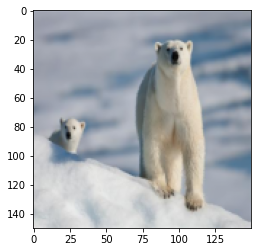

time: 6.21 s


In [35]:
#Testing a new image

flat_data = []
url = input("Enter your URL: ")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
print(img.shape)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your URL: https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Zebra_%2824694097565%29.jpg/1200px-Zebra_%2824694097565%29.jpg
(800, 1200, 3)
 PREDICTED OUTPUT: Zebra


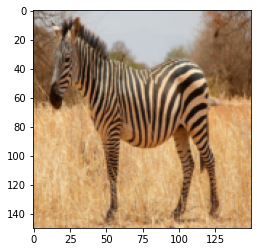

time: 18.5 s


In [36]:
#testing for another image
flat_data = []
url = input("Enter your URL: ")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
print(img.shape)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')